### EDA On Netflix Dataset


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

#### Imputing Missing Values, Checking Duplicates and Fixing data types (if needed)

In [2]:
data  = pd.read_csv('netflix_titles.csv')
netflix_overall = pd.DataFrame(data)
print(netflix_overall.head())
print(netflix_overall.columns)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
# Attributes Director, cast, country, date_added, ratinf and duration have null values in descending order respectively
# print(netflix_overall.isna().sum())
# Missing rates in the dataframe
for i in netflix_overall.columns:
    null_rate = netflix_overall[i].isna().sum() / len(netflix_overall) * 100
    if null_rate > 0:
        print(" {} null_rate ->  {}%".format(i, round(null_rate,2)))   

 director null_rate ->  29.91%
 cast null_rate ->  9.37%
 country null_rate ->  9.44%
 date_added null_rate ->  0.11%
 rating null_rate ->  0.05%
 duration null_rate ->  0.03%


5 columns have missing values, with Director missing almost 1/3 of the time

## Dealing with Missing Values
- Replacing Blank Countries with mode country 

- I have decided not to drop directors and cast, as it could be interesting to look at movies of particular directors and genres

In [4]:
netflix_overall['country'] = netflix_overall['country'].fillna(netflix_overall['country'].mode()[0])
netflix_overall['cast'].replace(np.nan, 'No Data', inplace=True)
netflix_overall['director'].replace(np.nan, 'No Data', inplace=True)

# dropping duplicate values
netflix_overall.drop_duplicates(inplace=True)
#check if the values are imputed
print(netflix_overall.isna().sum())


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


In [5]:
print(netflix_overall['date_added'].dtype)
#it outputs, 'object' which means there are different date formats
netflix_overall['date_added'] = pd.to_datetime(netflix_overall['date_added'], errors='coerce')
netflix_overall[netflix_overall['date_added'].isnull()]['date_added']

# Let's have a look at the date_added missing values' other attributes
print(netflix_overall[netflix_overall['date_added'].isnull()].head())
# print(netflix_overall[netflix_overall['date_added'].isnull()].shape)
#there are 98 missing values in the date format, which shows 'NaT' not a time type
# we will replace those values with (release_year + 1) value if it is a movie/series both,
# estimating that those movies 

#Dropped rest of the Nan values
print(netflix_overall.shape)
netflix_overall.dropna(inplace=True)
print(netflix_overall.shape)


object
     show_id     type                                        title  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories   
6079   s6080  TV Show                              Abnormal Summit   
6174   s6175  TV Show              Anthony Bourdain: Parts Unknown   
6177   s6178  TV Show                                     忍者ハットリくん   
6213   s6214  TV Show                                Bad Education   

                     director  \
6066                  No Data   
6079  Jung-ah Im, Seung-uk Jo   
6174                  No Data   
6177                  No Data   
6213                  No Data   

                                                   cast         country  \
6066  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6079           Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo     South Korea   
6174                                   Anthony Bourdain   United States   
6177                                            No Data           Japan  

In [6]:
# Seperating Shows and Movies, performing analysis differently on shows and movies
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show']
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie']

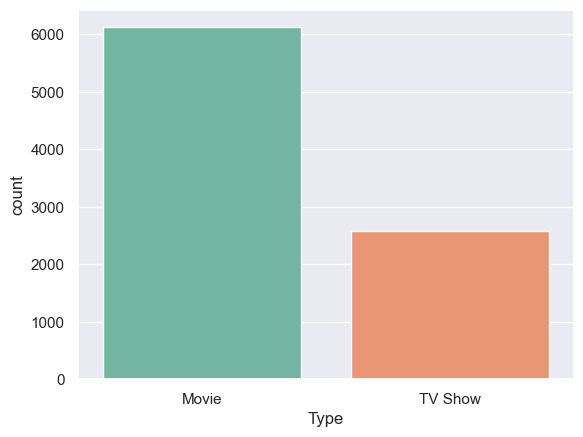

In [7]:
sns.set_theme(style='darkgrid',palette='pastel')
ax = sns.countplot(x='type', data=netflix_overall, palette='Set2')
plt.xlabel('Type')
plt.show()
#It is evident that there are more movies than shows in this dataset

  date_added  year  month month_name
1 2021-09-24  2021      9  September
2 2021-09-24  2021      9  September
3 2021-09-24  2021      9  September
4 2021-09-24  2021      9  September
5 2021-09-24  2021      9  September
['December', 'November', 'October', 'September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']


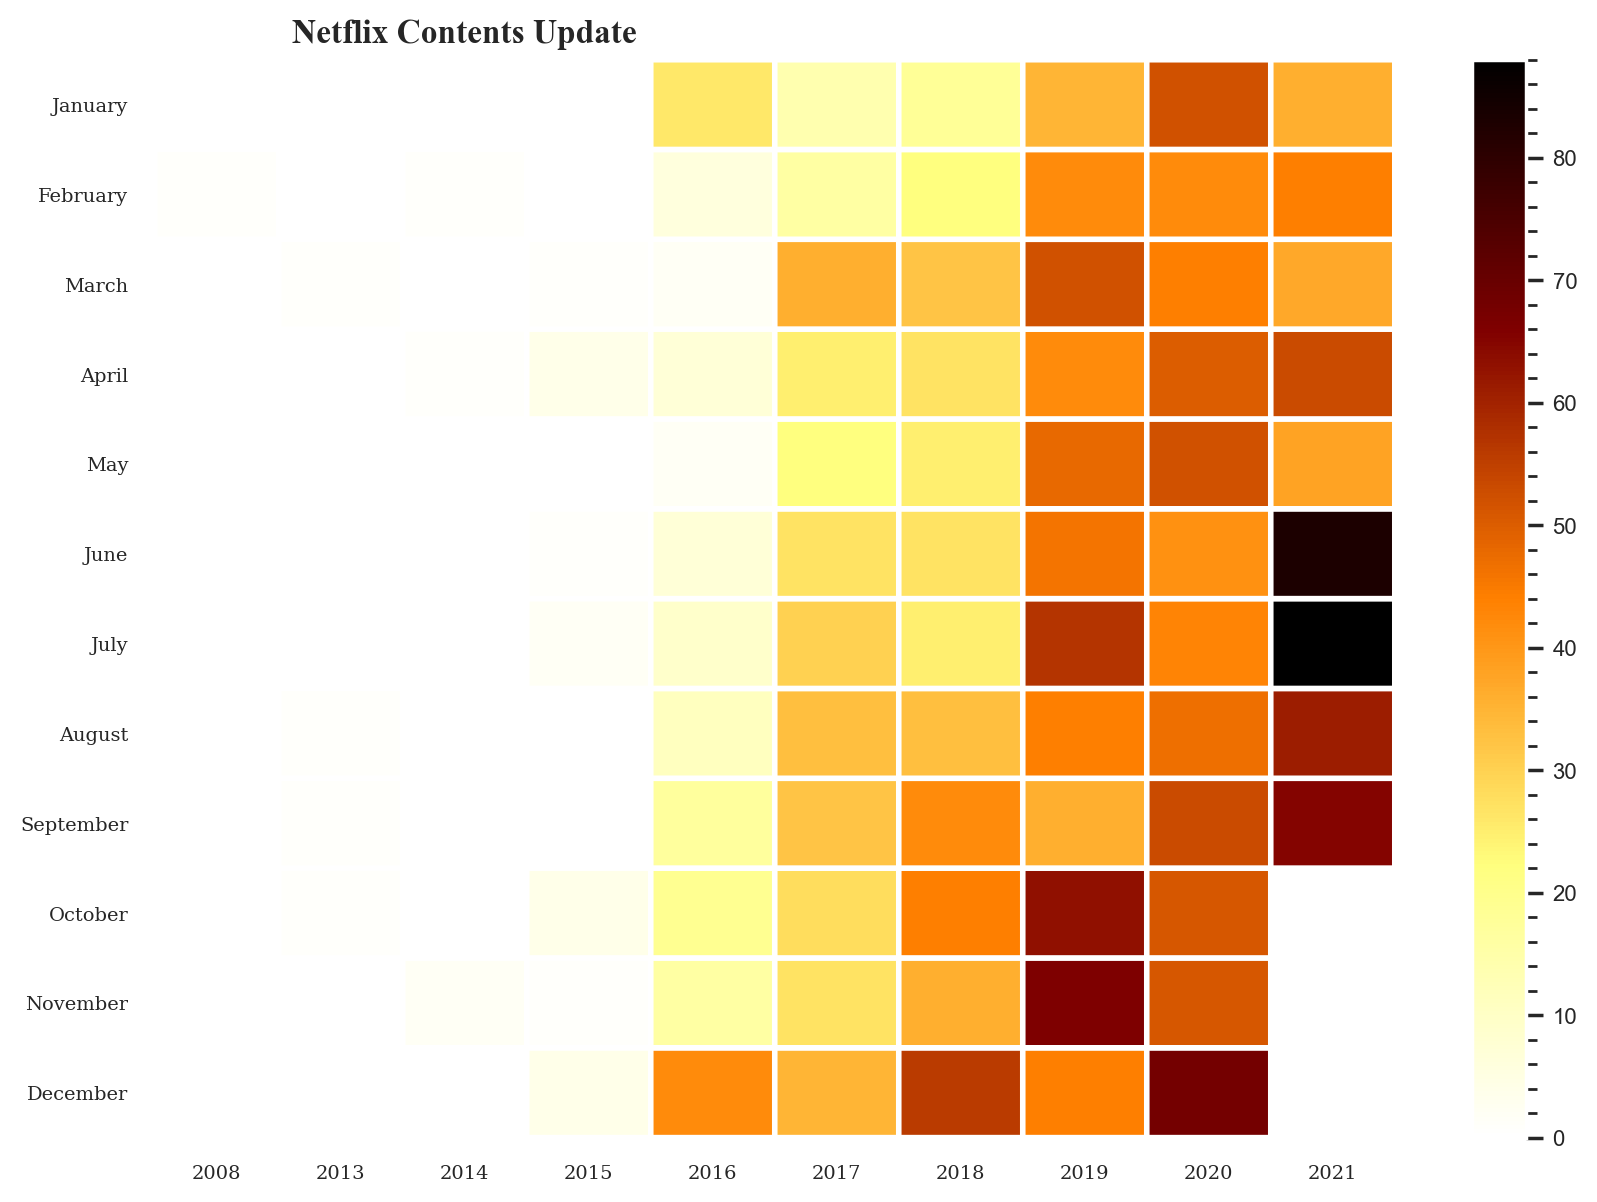

In [29]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = pd.DatetimeIndex(netflix_date['date_added']).year
netflix_date['month'] = pd.DatetimeIndex(netflix_date['date_added']).month
netflix_date['month_name'] = netflix_date['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
print(netflix_date.head())

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
print(month_order)


df = netflix_date.groupby('year')['month_name'].value_counts().unstack(level=1).fillna(0)[month_order].T
# print(df)

#plotting
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='Times New Roman', fontweight='bold', position=(0.250, 1.0+0.02))
cbar = plt.colorbar() #heatmap

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()